In [1]:
# import libraries

import mysql.connector
from mysql.connector import Error
import pandas as pd

In [2]:
#create server connection
def create_server_connection(host_name, user_name, user_password):
    connection = None
    try:
        connection = mysql.connector.connect(
            host = host_name,
            user = user_name,
            passwd = user_password
        )
        print(" MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")
    return connection

#Use SQL Terminal Password

pw = ""

#Database name
Db = "Bike_sales"
connection = create_server_connection("localhost", "root", pw)


 MySQL Database connection successful


In [3]:
#create database Bike_sales
def create_database(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        print("Database created successfully")
    except Error as err:
        print(f"Error: '{err}'")
create_database_query = "create database Bike_sales"
create_database(connection, create_database_query)

Error: '1007 (HY000): Can't create database 'bike_sales'; database exists'


In [4]:
# connect to database

def create_Db_connection(host_name, user_name, user_password, Db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
           host = host_name,
           user = user_name,
           passwd = user_password,
           database = Db_name)
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")
    return connection

In [5]:
# Execute the sql queries

def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query was successful")
    except Error as err:
        print(f"Error: '{err}'")

In [6]:
create_sales_table = """
create table sales(
Sales_order int primary key,
Date date,
Customer_Age int,
Customer_Gender char(1),
Country varchar (50),
States varchar (50),
product_Category varchar (20),
Order_Quantity int,
Unit_Cost float,
Unit_price float,
Profit float,
Cost float,
Revenue float
);
"""
#connect to the database
connection = create_Db_connection("localhost", "root", pw, Db)
execute_query(connection, create_sales_table)

MySQL Database connection successful
Error: '1050 (42S01): Table 'sales' already exists'


In [7]:
# insert data
data_sales = """
Insert into sales values
(261695, '2021-12-01', 39, 'F', 'United States', 'California', 'Bikes', 4, 1252.00, 2295.00, 4172.00, 5008.00, 9180.00),
(261696, '2021-12-01', 44, 'M', 'United Kingdom', 'England', 'Bikes', 1, 1266.00, 2320.00, 1054.00, 1266.00, 2320.00),
(261697, '2021-12-02', 37, 'M', 'United States', 'California', 'Bikes', 2, 420.00, 769.00, 698.00, 840.00, 1538.00),
(261698, '2021-12-02', 31, 'F', 'Australia', 'New South Wales', 'Bikes', 1, 420.00, 769.00, 349.00, 420.00, 769.00),
(261699, '2021-12-03', 37, 'F', 'United States', 'California', 'Bikes', 2, 1252.00, 2295.00, 2086.00, 2504.00, 4590.00),
(261700, '2021-12-03', 24, 'F', 'United Kingdom', 'England', 'Bikes', 1, 1252.00, 2295.00, 1043.00, 1252.00, 2295.00),
(261701, '2021-12-03', 37, 'M', 'United States', 'Washington', 'Bikes', 1, 1252.00, 2295.00, 1043.00, 1252.00, 2295.00),
(261702, '2021-12-04', 31, 'F', 'Australia', 'New South Wales', 'Bikes', 4, 420.00, 769.00, 1396.00, 1680.00, 3076.00),
(261703, '2021-12-05', 39, 'F', 'United States', 'California', 'Bikes', 4, 1252.00, 2295.00, 4172.00, 5008.00, 9180.00),
(261704, '2021-12-05', 42, 'M', 'Germany', 'Nordrhein-Westfalen', 'Bikes', 4, 1252.00, 2295.00, 4172.00, 5008.00, 9180.00),
(261705, '2021-12-05', 35, 'F', 'Australia', 'Queensland', 'Bikes', 1, 1266.00, 2320.00, 1054.00, 1266.00, 2320.00)
"""
connection = create_Db_connection("localhost", "root", pw, Db)
execute_query(connection, data_sales)

MySQL Database connection successful
Error: '1062 (23000): Duplicate entry '261695' for key 'sales.PRIMARY''


In [8]:
# reading queries
def read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print(f"Error: '{err}'")

In [9]:
# Using the select statement
Q1 = """
select * from sales;
"""
connection = create_Db_connection("localhost", "root", pw, Db)
results = read_query(connection, Q1)
for result in results:
    print(result)

MySQL Database connection successful
(261695, datetime.date(2021, 12, 1), 39, 'F', 'United States', 'California', 'Bikes', 4, 1252.0, 2295.0, 4172.0, 5008.0, 9180.0)
(261696, datetime.date(2021, 12, 1), 44, 'M', 'United Kingdom', 'England', 'Bikes', 1, 1266.0, 2320.0, 1054.0, 1266.0, 2320.0)
(261697, datetime.date(2021, 12, 2), 37, 'M', 'United States', 'California', 'Bikes', 2, 420.0, 769.0, 698.0, 840.0, 1538.0)
(261698, datetime.date(2021, 12, 2), 31, 'F', 'Australia', 'New South Wales', 'Bikes', 1, 420.0, 769.0, 349.0, 420.0, 769.0)
(261699, datetime.date(2021, 12, 3), 37, 'F', 'United States', 'California', 'Bikes', 2, 1252.0, 2295.0, 2086.0, 2504.0, 4590.0)
(261700, datetime.date(2021, 12, 3), 24, 'F', 'United Kingdom', 'England', 'Bikes', 1, 1252.0, 2295.0, 1043.0, 1252.0, 2295.0)
(261701, datetime.date(2021, 12, 3), 37, 'M', 'United States', 'Washington', 'Bikes', 1, 1252.0, 2295.0, 1043.0, 1252.0, 2295.0)
(261702, datetime.date(2021, 12, 4), 31, 'F', 'Australia', 'New South Wa

In [10]:
Q2 = """
select country, revenue from sales;
"""
connection = create_Db_connection("localhost", "root", pw, Db)
results = read_query(connection, Q2)
for result in results:
    print(result)

MySQL Database connection successful
('United States', 9180.0)
('United Kingdom', 2320.0)
('United States', 1538.0)
('Australia', 769.0)
('United States', 4590.0)
('United Kingdom', 2295.0)
('United States', 2295.0)
('Australia', 3076.0)
('United States', 9180.0)
('Germany', 9180.0)
('Australia', 2320.0)
('United States', 2295.0)
('United Kingdom', 2307.0)
('Canada', 2295.0)
('Australia', 2295.0)
('United Kingdom', 2320.0)
('United States', 3076.0)
('United States', 4640.0)
('Australia', 2260.0)
('Canada', 9280.0)


In [11]:
Q3 = """
select distinct year(Date) from sales;
"""
connection = create_Db_connection("localhost", "root", pw, Db)
results = read_query(connection, Q3)
for result in results:
    print(result)

MySQL Database connection successful
(2021,)


In [12]:
Q4 = """
select distinct country from sales;
"""
connection = create_Db_connection("localhost", "root", pw, Db)
results = read_query(connection, Q4)
for result in results:
    print(result)

MySQL Database connection successful
('United States',)
('United Kingdom',)
('Australia',)
('Germany',)
('Canada',)


In [13]:
Q5 = """
select * from sales where revenue > 760.00;
"""
connection = create_Db_connection("localhost", "root", pw, Db)
results = read_query(connection, Q5)
for result in results:
    print(result)

MySQL Database connection successful
(261695, datetime.date(2021, 12, 1), 39, 'F', 'United States', 'California', 'Bikes', 4, 1252.0, 2295.0, 4172.0, 5008.0, 9180.0)
(261696, datetime.date(2021, 12, 1), 44, 'M', 'United Kingdom', 'England', 'Bikes', 1, 1266.0, 2320.0, 1054.0, 1266.0, 2320.0)
(261697, datetime.date(2021, 12, 2), 37, 'M', 'United States', 'California', 'Bikes', 2, 420.0, 769.0, 698.0, 840.0, 1538.0)
(261698, datetime.date(2021, 12, 2), 31, 'F', 'Australia', 'New South Wales', 'Bikes', 1, 420.0, 769.0, 349.0, 420.0, 769.0)
(261699, datetime.date(2021, 12, 3), 37, 'F', 'United States', 'California', 'Bikes', 2, 1252.0, 2295.0, 2086.0, 2504.0, 4590.0)
(261700, datetime.date(2021, 12, 3), 24, 'F', 'United Kingdom', 'England', 'Bikes', 1, 1252.0, 2295.0, 1043.0, 1252.0, 2295.0)
(261701, datetime.date(2021, 12, 3), 37, 'M', 'United States', 'Washington', 'Bikes', 1, 1252.0, 2295.0, 1043.0, 1252.0, 2295.0)
(261702, datetime.date(2021, 12, 4), 31, 'F', 'Australia', 'New South Wa

In [14]:
Q6 = """
select * from sales order by profit;
"""
connection = create_Db_connection("localhost", "root", pw, Db)
results = read_query(connection, Q6)
for result in results:
    print(result)

MySQL Database connection successful
(261698, datetime.date(2021, 12, 2), 31, 'F', 'Australia', 'New South Wales', 'Bikes', 1, 420.0, 769.0, 349.0, 420.0, 769.0)
(261697, datetime.date(2021, 12, 2), 37, 'M', 'United States', 'California', 'Bikes', 2, 420.0, 769.0, 698.0, 840.0, 1538.0)
(261713, datetime.date(2021, 12, 8), 19, 'F', 'Australia', 'New South Wales', 'Bikes', 4, 308.0, 565.0, 1028.0, 1232.0, 2260.0)
(261700, datetime.date(2021, 12, 3), 24, 'F', 'United Kingdom', 'England', 'Bikes', 1, 1252.0, 2295.0, 1043.0, 1252.0, 2295.0)
(261701, datetime.date(2021, 12, 3), 37, 'M', 'United States', 'Washington', 'Bikes', 1, 1252.0, 2295.0, 1043.0, 1252.0, 2295.0)
(261706, datetime.date(2021, 12, 5), 37, 'F', 'United States', 'California', 'Bikes', 1, 1252.0, 2295.0, 1043.0, 1252.0, 2295.0)
(261708, datetime.date(2021, 12, 6), 27, 'M', 'Canada', 'British Columbia', 'Bikes', 1, 1252.0, 2295.0, 1043.0, 1252.0, 2295.0)
(261709, datetime.date(2021, 12, 6), 36, 'M', 'Australia', 'New South Wa

In [15]:
from_Db = []

for result in results:
    result = list(result)
    from_Db.append(result)
columns = ["Sales_order",  "Date", "Customer_Age", "Customer_Gender", "Country", "States", "Product_Category", "Order_Quantity", "Unit_Cost", "Unit_Price", "Profit", "Cost", "Revenue"]
df = pd.DataFrame(from_Db, columns = columns)

display(df)


,Sales_order,Date,Customer_Age,Customer_Gender,Country,States,Product_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261698,2021-12-02,31,F,Australia,New South Wales,Bikes,1,420.0,769.0,349.0,420.0,769.0
1,261697,2021-12-02,37,M,United States,California,Bikes,2,420.0,769.0,698.0,840.0,1538.0
2,261713,2021-12-08,19,F,Australia,New South Wales,Bikes,4,308.0,565.0,1028.0,1232.0,2260.0
3,261700,2021-12-03,24,F,United Kingdom,England,Bikes,1,1252.0,2295.0,1043.0,1252.0,2295.0
4,261701,2021-12-03,37,M,United States,Washington,Bikes,1,1252.0,2295.0,1043.0,1252.0,2295.0
5,261706,2021-12-05,37,F,United States,California,Bikes,1,1252.0,2295.0,1043.0,1252.0,2295.0
6,261708,2021-12-06,27,M,Canada,British Columbia,Bikes,1,1252.0,2295.0,1043.0,1252.0,2295.0
7,261709,2021-12-06,36,M,Australia,New South Wales,Bikes,1,1252.0,2295.0,1043.0,1252.0,2295.0
8,261707,2021-12-06,23,M,United Kingdom,England,Bikes,3,420.0,769.0,1047.0,1260.0,2307.0
9,261696,2021-12-01,44,M,United Kingdom,England,Bikes,1,1266.0,2320.0,1054.0,1266.0,2320.0


In [16]:
data_sales = """
INSERT INTO sales (Sales_order, Date, Customer_Age, Customer_Gender, Country, States, Product_Category, Order_Quantity, Unit_Cost, Unit_Price, Profit, Cost, Revenue) 
VALUES
(261706, '2021-12-05', 37, 'F', 'United States', 'California', 'Bikes', 1, 1252.00, 2295.00, 1043.00, 1252.00, 2295.00),
(261707, '2021-12-06', 23, 'M', 'United Kingdom', 'England', 'Bikes', 3, 420.00, 769.00, 1047.00, 1260.00, 2307.00),
(261708, '2021-12-06', 27, 'M', 'Canada', 'British Columbia', 'Bikes', 1, 1252.00, 2295.00, 1043.00, 1252.00, 2295.00),
(261709, '2021-12-06', 36, 'M', 'Australia', 'New South Wales', 'Bikes', 1, 1252.00, 2295.00, 1043.00, 1252.00, 2295.00),
(261710, '2021-12-06', 47, 'M', 'United Kingdom', 'England', 'Bikes', 1, 1266.00, 2320.00, 1054.00, 1266.00, 2320.00),
(261711, '2021-12-07', 30, 'M', 'United States', 'California', 'Bikes', 4, 420.00, 769.00, 1396.00, 1680.00, 3076.00),
(261712, '2021-12-07', 38, 'M', 'United States', 'California', 'Bikes', 2, 1266.00, 2320.00, 2108.00, 2532.00, 4640.00),
(261713, '2021-12-08', 19, 'F', 'Australia', 'New South Wales', 'Bikes', 4, 308.00, 565.00, 1028.00, 1232.00, 2260.00),
(261714, '2021-12-08', 30, 'F', 'Canada', 'British Columbia', 'Bikes', 4, 1266.00, 2320.00, 4216.00, 5064.00, 9280.00);
"""
connection = create_Db_connection("localhost", "root", pw, Db)
execute_query(connection, data_sales)

MySQL Database connection successful
Error: '1062 (23000): Duplicate entry '261706' for key 'sales.PRIMARY''


In [17]:
df.describe()

,Sales_order,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000,20.0000,20.000000
mean,261704.50000,34.150000,2.300000,1000.300000,1833.25000,1760.850000,2114.7000,3875.550000
std,5.91608,7.198501,1.380313,403.026589,738.95886,1301.946651,1562.7947,2864.740963
min,261695.00000,19.000000,1.000000,308.000000,565.00000,349.000000,420.0000,769.000000
25%,261699.75000,30.000000,1.000000,420.000000,769.00000,1043.000000,1252.0000,2295.000000
50%,261704.50000,36.500000,2.000000,1252.000000,2295.00000,1054.000000,1266.0000,2320.000000
75%,261709.25000,38.250000,4.000000,1255.500000,2301.25000,2091.500000,2511.0000,4602.500000
max,261714.00000,47.000000,4.000000,1266.000000,2320.00000,4216.000000,5064.0000,9280.000000


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


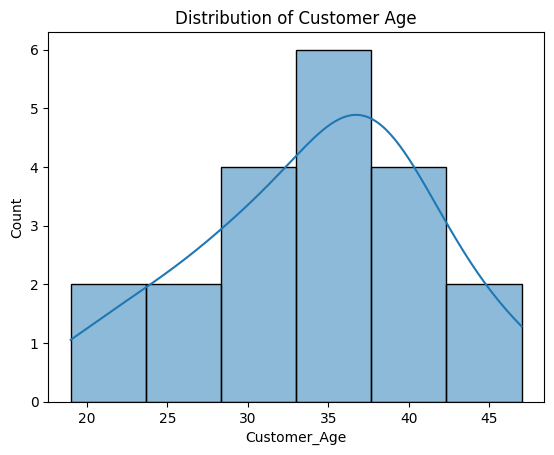

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


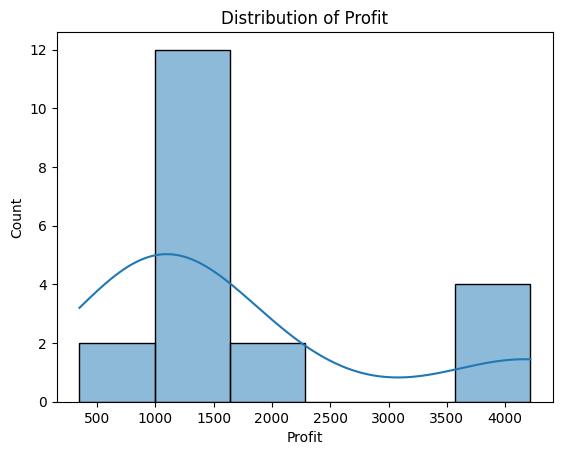

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Customer Age
sns.histplot(df['Customer_Age'], kde=True)
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Profit
sns.histplot(df['Profit'], kde=True)
plt.title('Distribution of Profit')
plt.show()

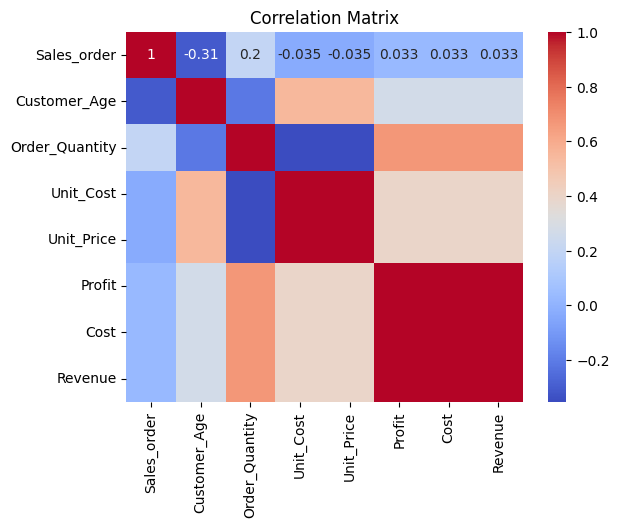

In [19]:
# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


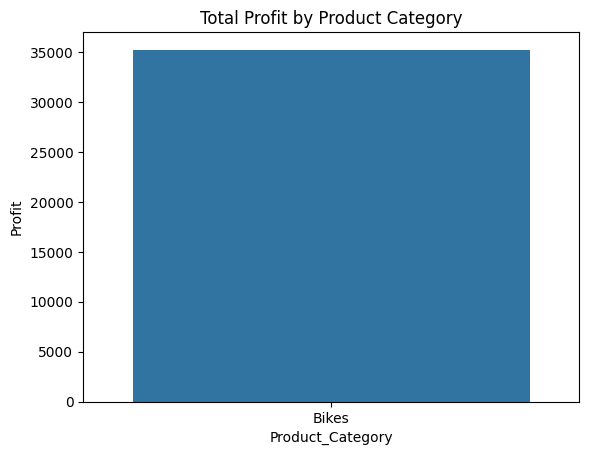

In [20]:
profit_by_category = df.groupby('Product_Category')['Profit'].sum().reset_index()
sns.barplot(x='Product_Category', y='Profit', data=profit_by_category)
plt.title('Total Profit by Product Category')
plt.show()


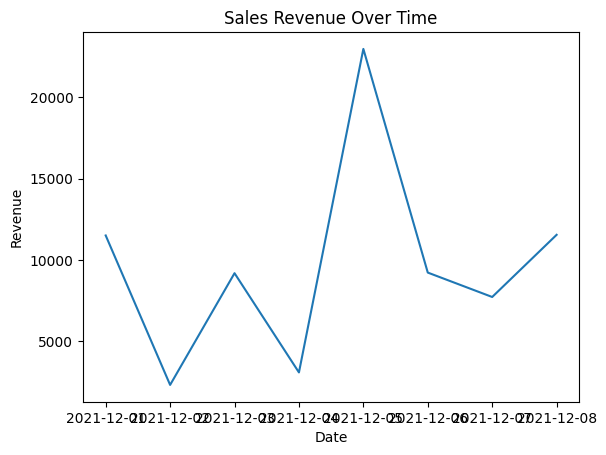

In [22]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
sales_trend = df.groupby('Date')['Revenue'].sum().reset_index()

plt.plot(sales_trend['Date'], sales_trend['Revenue'])
plt.title('Sales Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


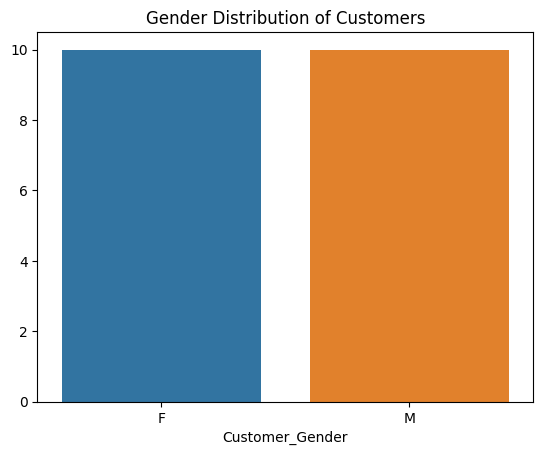

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


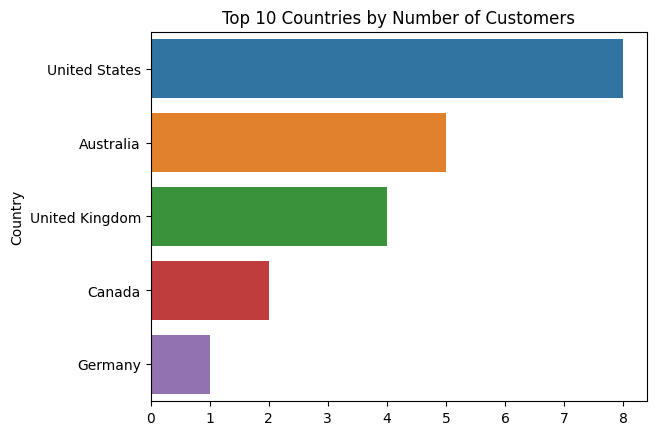

In [23]:
# Gender distribution
gender_distribution = df['Customer_Gender'].value_counts()
sns.barplot(x=gender_distribution.index, y=gender_distribution.values)
plt.title('Gender Distribution of Customers')
plt.show()

# Customers by Country
customers_by_country = df['Country'].value_counts().head(10)
sns.barplot(x=customers_by_country.values, y=customers_by_country.index)
plt.title('Top 10 Countries by Number of Customers')
plt.show()


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


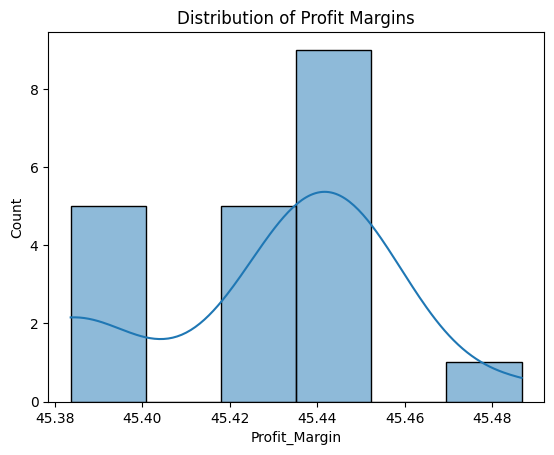

In [24]:
df['Profit_Margin'] = (df['Profit'] / df['Revenue']) * 100

# Descriptive stats for Profit Margin
df['Profit_Margin'].describe()

# Plotting the Profit Margin distribution
sns.histplot(df['Profit_Margin'], kde=True)
plt.title('Distribution of Profit Margins')
plt.show()


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


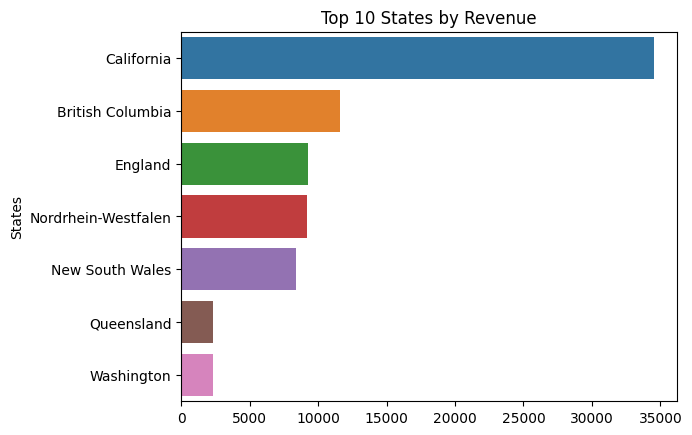

In [26]:
revenue_by_state = df.groupby('States')['Revenue'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=revenue_by_state.values, y=revenue_by_state.index)
plt.title('Top 10 States by Revenue')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_9772\4252384132.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_by_segment = df.groupby('Customer_Segment')['Profit'].sum().reset_index()
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


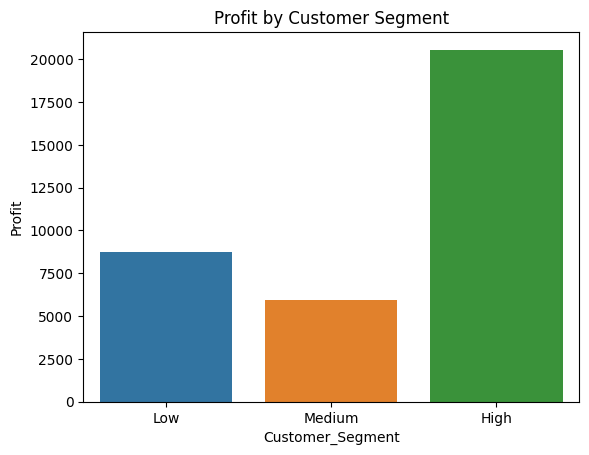

In [27]:
# Example: Segment by Order Quantity
df['Customer_Segment'] = pd.cut(df['Order_Quantity'], bins=[0, 1, 3, 5], labels=['Low', 'Medium', 'High'])

# Analyze Profit by Customer Segment
profit_by_segment = df.groupby('Customer_Segment')['Profit'].sum().reset_index()
sns.barplot(x='Customer_Segment', y='Profit', data=profit_by_segment)
plt.title('Profit by Customer Segment')
plt.show()


C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


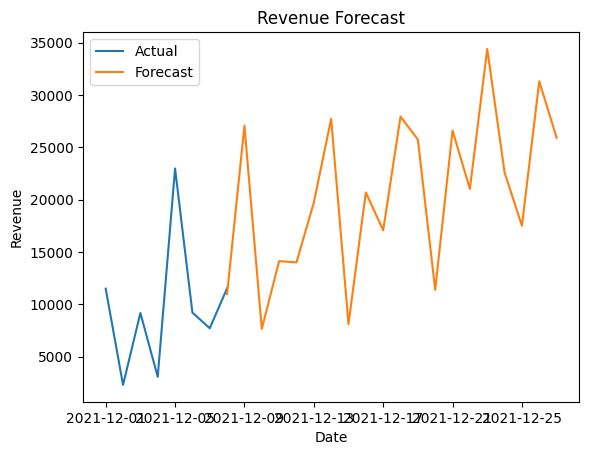

In [28]:
from statsmodels.tsa.arima.model import ARIMA

# Example: Forecasting Revenue
model = ARIMA(sales_trend['Revenue'], order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=20)

plt.plot(sales_trend['Date'], sales_trend['Revenue'], label='Actual')
plt.plot(pd.date_range(sales_trend['Date'].iloc[-1], periods=20, freq='D'), forecast, label='Forecast')
plt.title('Revenue Forecast')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()
